# Exercise 4 [Cart-Pole Model]

In [1]:
# a few packages we need to import
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import IPython

# Problem
We are interested in computing a linear optimal control law to stabilize the cart pole system when subjected to small
deviations from the rest position (when $x=0$, $v=0$, $\theta = \pi$ and $\omega = 0$)

<img src="cart_pole.png" alt="drawing" width="400"/>

The dynamic equations of the Cart-Pole model are written as
$$\begin{eqnarray} \dot{x} &=& v \\ 
\dot{v} &=& \frac{f + m_p \sin\theta (l \omega^2 + g \cos \theta)}{m_c + m_p \sin^2 \theta} \\
\dot{\theta} &=& \omega \\
\dot{\omega} &=& \frac{-f\cos\theta -m_p l \omega^2 \cos\theta\sin\theta - (m_c + m_p)g \sin\theta}{l(m_c + m_p \sin^2 \theta)}
\end{eqnarray}$$

which we discretize using a time step $\Delta t$
$$ \begin{eqnarray} 
x_{n+1} &=& x_n + \Delta t\cdot v_n \\ 
v_{n+1} &=& v_n + \Delta t \cdot \left( \frac{f_n + m_p \sin\theta_n (l \omega_n^2 + g \cos \theta_n)}{m_c + m_p \sin^2 \theta_n} \right)\\
\theta_{n+1} &=& \theta_n + \Delta t \cdot \omega_n \\
\omega_{n+1} &=& \omega_n + \Delta t \cdot \left( \frac{-f_n\cos\theta_n -m_p l \omega_n^2 \cos\theta_n\sin\theta_n - (m_c + m_p)g \sin\theta_n}{l(m_c + m_p \sin^2 \theta_n)}\right)
\end{eqnarray}$$

This is the equations we use to simulate the dynamics of the system below

## Simulation of the Cart-Pole model and display functions

In [2]:
def simulate_cart_pole(x0, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81):
    """
    This function integrates the cart-pole system (the nonlinear system) for horizon_length steps
    
    Arguments:
    x0: numpy vector, initial value for the system (4 numbers for x,v,theta,omega)
    K: a list of control gains (of length horizon_length)
    uff: a list of feedforward control inputs such that the control will be f[i]=K[i] * x[i] + uff[i]
    horizon_length: lenght of the horizon to integrate
    
    Returns:
    x a numpy array containing the integration result
    u a numpy array containing the control at each step
    """
    delta_t = 0.01
        
    x=np.empty([4, horizon_length+1])
    x[:,0] = x0
    
    u=np.empty([horizon_length])

    for i in range(horizon_length):        
        u[i] = K[i].dot(x[:,i]) + uff[i]
        dx = np.array([x[1,i],
                      (u[i] + mp*np.sin(x[2,i])*(l*(x[3,i]**2) + g * np.cos(x[2,i])))/(mc+mp*np.sin(x[2,i])**2),
                      x[3,i],
                      (-u[i]*np.cos(x[2,i])-mp*l*(x[3,i]**2)*np.cos(x[2,i])*np.sin(x[2,i])-(mp+mc)*g*np.sin(x[2,i]))/(l*(mc+mp*np.sin(x[2,i])**2))
                       ])
        x[:,i+1] = x[:,i] + delta_t * dx
    return x, u

In [3]:
def animate_cart_pole(x):
    """
    This function makes an animation showing the behavior of the cart-pole
    takes as input the result of a simulation
    """
    
    #subsample
    plotx = x[:,0::5]
    
    fig = matplotlib.figure.Figure(figsize=[6,2.3])
    matplotlib.backends.backend_agg.FigureCanvasAgg(fig)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=[-3,3], ylim=[-1.,1.3])
    ax.grid()
    
    list_of_lines = []
    
    #create the cart pole
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    
    cart_length = 0.5
    cart_height = 0.25
    
    def animate(i):
        for l in list_of_lines: #reset all lines
            l.set_data([],[])
        
        x_back = plotx[0,i] - cart_length
        x_front = plotx[0,i] + cart_length
        y_up = cart_height
        y_down = 0.
        x_pend = plotx[0,i] + np.sin(plotx[2,i])
        y_pend = cart_height - np.cos(plotx[2,i])
        
        list_of_lines[0].set_data([x_back, x_front], [y_down, y_down])
        list_of_lines[1].set_data([x_front, x_front], [y_down, y_up])
        list_of_lines[2].set_data([x_back, x_front], [y_up, y_up])
        list_of_lines[3].set_data([x_back, x_back], [y_down, y_up])
        list_of_lines[4].set_data([plotx[0,i], x_pend], [cart_height, y_pend])
        
        return list_of_lines
    
    def init():
        return animate(0)


    ani = animation.FuncAnimation(fig, animate, np.arange(0, len(plotx[0,:])),
        interval=50, blit=True, init_func=init)
    plt.close(fig)
    plt.close(ani._fig)
    IPython.display.display_html(IPython.core.display.HTML(ani.to_html5_video()))

## Example simulation
Example of a simulation of the cart-pole without any control input
here we set the control gains to be 0 and uff to be 0 as well

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAwrVtZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTcg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAM
FmWIhAA7//73Tr8Cm0WXagOSVwr2yqQmWblSawHypgAAAwAAAwAAAwLa9High8PTbfzAQ1g/v7DP
jpCaNuVz16+CXV0ME4MVk2ePNsDSmiwAlz89wBzD4kvgssOUow6ch5VX0SVPopkFv/QnaOCyC8Zb
3APWV87Gz5Wkg9PMxQUPumwOERGjcnzETxYpuNCCS+U5RDI4S4iE4GqWDzw8maTHpL98sdgSLWYl
IYk/7Lowm/Oihcr680f6XWC8RrgvPCHsJcYKGAFKdljnzhPT7q4GWLYT86AZXrwr5QbkUo7GhR8l
4wRCiHyVMFO65jlk50teGilZ/u7bAPXgVvDUBRKp7N8QimW5l+iL7ZmNZQHG19lrOeOwzDQTznfC
iCsKJi/w4hW3Lzje1va1xbhXY3wtdF72M4NNxSefKMBOl+kC4JLZyrImEU+SAhqDmbU6UwANgaGh
D+4N+/6C/5QbEP426HIoLrbY9uMakV3WYMfMSbiZ3NM7XSYL7NIMhcwH3eglDZ2WsmAIrOQDwivV
oR8N+WGOGvUH2rLzoZcWzn+Tlv9N5qjEcyC6dt7PD3HFcf2aL+3wZyyyn/qa9InnbEpm/xxxFQH1
VtCv51k1hJi7mGIUQi5AJki+iwO7eOznl8qoaXNF8uPtaER55X7M/CCunVfA5fmKoWAfgssbnKNk
7OSoJYH/m+zJJViWNFMl2CnbJgw/V3vkNjme2fefudzUrHeYPX5GgH9z16Nwx/vhJb15teTGpfrp
H6HiNXduqRb/XzkV1VN+jwLVpi5RSxAZlWS73mPTnZliNw23ZpPxaI8uDdvuGUc8/zz6c3fSBcOz
ykf4dtjVcWWJqNSiock8LB3FSg6Ron1bIqtjlxF8RiT7AQ0APKIa3xJU5R5993LfgDOwqR9+P7Xi
JjugetBhqzqPYs5LrrmKIbj+niXFYPOr6d6sXmvIX18l1cPyq8jraHmm7tErEDSttA61RAKTF3oM
39XRgXAzPRmYDUx998OCb+9oAlIEmLVmsJOGjfnd42x7zrHEljRtul7iodw0iRHMZJ1DJZl+xyGw
68KSjA3Hy2HxNpg38yuhHj7wBxMHPu3oHhxyarNq2dMrGf5UPKVx+zB9FH8dv7lkeINTlb6EpZfO
oZeA5q/YXGafpy7T+gBcI21xKIr+GIQaMMNwf4dtd8kLKbHsndRYlnS/ZKi/EyJ/nZN4OTyoMpkM
m651FfCILlBewCZZCcj87o280thjkeYiNv5ZIaWu5a2oC5PVdHuOfDHyW+FO3164mCCTz2BtMJJ3
wTY8rUmm8J+llKYgoOME9/Ogsd55DDapv/7vH3sUK5fKdw9sIiBx4NkDuIsm5KJLkmCQBPDF73iI
d/HWa2gnJuf1JweOoxNqMO/WdYRlPdePAq5m98JG9CmYMIbfLs2nk85k1boWDLblHBkVnc9603MZ
jWEagAAGKkzdOwdDQq9R5v26FMUPBvJsfkIFfEgNn+1w+Z2Wua+zc+Lr2xbVO8HAhh6Ph4rFNf5G
irVDqj5m2wmYMKics1n3xSUD3L0DBz1dCcarhoAb+GsD4tqeUFbiyfi9Ba+rqEhMm91wuBlRIfbz
eHUL0JABuEQ6TSRwqJF4u9lStCoX7p/9ff/WrKSYWrqne63tjuQJJbOE07Mh9TLAZmhBzqf5Jliw
lUUf2bcD5GjxtGugzybA/Y/OE8qNwI1bMtilaoEXRN00rL2ouTUzxeKgTMg8Bt38ZsYSlQpp8keL
8Lmg+xMq8VdkQFxWXpAGgTxtYaI92wg/+wI6FGxT818y7n4DNuxDvEyyHvy587xkm+NfgHlMQygr
1aOyFtHq0VJYsZhk8TvF3ykc2l0sHpO/9aN7jJSVv2rmIkizbOluM76IEP5bUi6Q5O6rXRm0k3To
9Cnczld+kYGNgw+5MZgpCe4HeW0/5pWhgg4JmgHPeaPg74Thqr45rAU+lrEtp6CBuoH81XRTE7sg
k6pDT0S/d5VMGcCP2urOu2GVgRvWGBMkcAeH1YRdorixBoAAkMR9pzZtB4jz7OSXi1Fa5UatEQp6
+9MJlnvlCTaQztWAH37Vy0jxaF/xDBufcIAGJ5Hq54XCmcvAvPc0c9Wrpyayis5xekaEyApAQAcq
PNWe5/qd9KZ7njzVagD315ybNvNF5JayYI180nO7HgWQYi8/MyxCLQH473b/kla/EHtZcOYAC7dN
PHgRWABwT3Kyeh8Zx5oppo9n0OW57y7qPFl0Mg/6xOd0tyMcEcKG29rA7d2FjJVk5MU4Zfz+12+U
BF02sG/VtfyKpSgCrCjNXALlwtF37SPirGPCEWXYpilXQOJAnRp5qYdyKzU7Ghdz4gxpRMVTPTz7
pCvs3gnUwPREcSAOit2Yw36EnlQxvVsrnoFG4TwnznGN8W4v9fu/9eWYp7eYsOYpuZ2XNhbOfDM6
b1jKspu6O4mvaW8Ptv2PPZdlszI5KWAqI3awO08UnykFh1alsPCaJyJgRAebAmWIIfJ0BNYaANw1
2IaOVFNQ6Cm45xFF/NSIfuwK8BarZpViuxLm+3btb9bZSaff4CuCxDk0uX5KpVQ8GVZyTWfLAhRu
uPvhQ/XeIetwBidCdf9FaJs84P8g9hMXA2r/gnOD/OpjdhSoEQw/Zr32h8o0lmLuzq2J9Yu/RywE
bOphM1kvJfBQQFMYPYj+z2Y4BFmQUVvy9P4VucEZmj0M7B/MqXLatNyoq/i/AhL8Rr2kARNSu6VI
AADQ2IUfN52gV8VvUbUlLVr9y3hfv9IFbW+cVYk1vBg9X0h+ZRaYF/8LlFHL/s8IEr/FdDgAOaaM
5J7uClpkbN40WJ7DhdSyAmsydfVPpzb2HBMWo3KXw3S9ozr89bHpp/KQLqEmdvycZkO6ITZkFMFj
Nk9y8pqcOCOtLZgFTlWjl

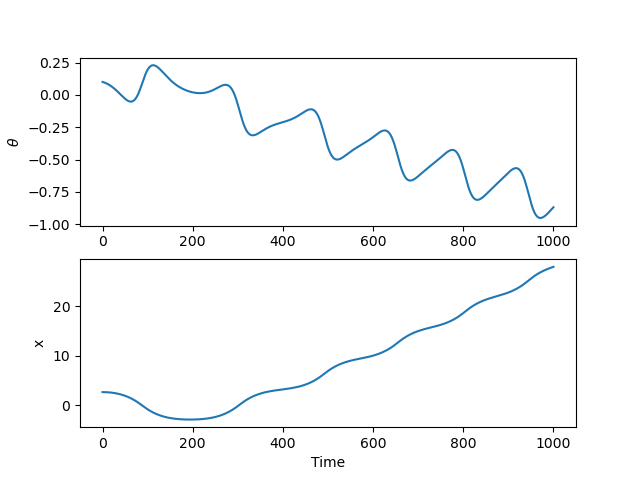

In [4]:
horizon_length = 1000 #this will simulate 10 seconds (since deltat = 0.01)

# here we set gains to 0
K = [np.array([0,0.,0,0])]
K = K*horizon_length
uff = [0.]
uff = uff*horizon_length

# initial conditions
x0 = np.array([0.1,-0.1,np.pi-0.5,0.])


mp=1.
mc=5.
l=1.
g=9.81
x,u = simulate_cart_pole(x0, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81)

# plot x and theta as a function of time
plt.figure()
plt.subplot(2,1,1)
plt.plot(x[0,:])
plt.ylabel(r'$\theta$')
plt.subplot(2,1,2)
plt.plot(x[2,:])
plt.ylabel('x')
plt.xlabel('Time')

# make an animation of the cart-pole
animate_cart_pole(x)

# Question 1
Linearize the discretized equations of the Cart-Pole Model around the resting position $\bar{x}=0$, $\bar{v}=0$, $\bar{\theta}=\pi$ and $\bar{\omega}=0$, $\bar{f}=0$ and write the dynamic equations in the form 

$$ \begin{bmatrix} \tilde{x}_{n+1} \\ \tilde{v}_{n+1} \\ \tilde{\theta}_{n+1} \\ \tilde{\omega}_{n+1} \end{bmatrix} = A \begin{bmatrix} \tilde{x}_{n} \\ \tilde{v}_{n} \\ \tilde{\theta}_{n} \\ \tilde{\omega}_{n} \end{bmatrix} + B \tilde{f}_n$$

where $A$ and $B$ are matrices of appropriate size and $\tilde{x}_n = x_n - \bar{x}$, $\tilde{v}_n = v_n - \bar{v}$, $\tilde{\theta}_n = \theta_n - \bar{\theta}$, $\tilde{\omega}_n = \omega_n - \bar{\omega}$ and $\tilde{f}_n = f_n - \bar{f}$. Remember that the resting position is a fixed point, i.e.

$$ \begin{bmatrix} \bar{x} \\ \bar{v} \\ \bar{\theta} \\ \bar{\omega} \end{bmatrix} = f(\bar{x}, \bar{v}, \bar{\theta}, \bar{\omega},  \bar{f})$$
where $f$ is the discretized dynamic equation of the Cart-Pole Model

# Question 2
We would like to use the linearized equation to compute an optimal controller that stabilizes the system around the resting position. 
1. Write a cost function that will help stabilize the resting position (be precise with the variables you use).
2. How would you (approximately) solve this optimal control problem?
3. What will be the form of the optimal controller $f_n$ (remember that the linearized system will give you $\tilde{f}_n$)?

# Question 3
1. Write a function (e.g. take example from Exercise 3) that computes the optimal control for the linearized problem. 2. Simulate the dynamics of the Cart-Pole Model with the computed controller for initial conditions $x=0.2$, $v=0.1$, $\theta=\pi-0.2$ and $\omega=0$. What happens? (show a plot of the states of the system and the cart-pole animation)
3. How can you change the response of the  system (how fast it stabilizes)? Give an example with a simulation.
4. Does the controller still work when $x=0.2$, $v=0.1$, $\theta=0.2$ and $\omega=0$? Why? (show a plot of the states of the system and the cart-pole animation, use a smaller horizon if necessary)

In [5]:
def check_controllability(A,B):
    """
    This function check  the controllabilitystate for system
    c=[B AB A^2B A^3B]
    """
    c=np.concatenate([B, np.dot(A, B), np.dot(A, A).dot(B),np.dot(A, A.dot(A)).dot(B)], axis=1)
    R=np.linalg.matrix_rank(c)
    print('rank is',R)
    if R< np.linalg.matrix_rank(A):
        print('is not controllable')
    else:print('is controllable')

def solve_ricatti_equations(A,B,Q,R,horizon_length):
    """
    This function solves the backward Riccatti equations for regulator problems of the form
    min xQx + sum(xQx + uRu) subject to xn+1 = Axn + Bun
    
    Arguments:
    A, B, Q, R: numpy arrays defining the problem
    horizon_length: length of the horizon
    
    Returns:
    P: list of numpy arrays containing Pn from N to 0
    K: list of numpy arrays containing Kn from N-1 to 0
    """
    P = [] #will contain the list of Ps from N to 0
    K = [] #will contain the list of Ks from N-1 to 0
    
    n=horizon_length
    current_p=Q
    P.append(current_p)
    while n>0:
        # print(n)
        C=np.dot(B.T, current_p).dot(B)
        D=np.dot(B.T,current_p).dot(A)
        current_K=-1*np.linalg.inv(R+C).dot(D)
        K.append(current_K)
        current_p=Q+np.dot(A.T,current_p).dot(A)+np.dot(np.dot(np.dot(A.T,current_p),B),current_K)
        P.append(current_p)
        n=n-1

    return P[::-1], K[::-1]

rank is 4
is controllable


/var/folders/hp/yg2kcb2j4c1fskm61_gk9q0c0000gn/T/ipykernel_46096/3612641173.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[i] = K[i].dot(x[:,i]) + uff[i]


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAU0ptZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTcg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAL
1WWIhAA3//728P4FNjuY0JcRzeidMx+/Fbi6NDe9zgAAAwAAAwAACNCLwaGfD0238wGYfdMii7By
vZNRdVBYvP3RAB4eACSVbF22Bsmyfb6jzR5K2ild3BqjjLWTX15l+3kBfmX+S+b/cJwZnoxzWW4k
h1lNQBPTTQH0t+FXkCN7Z/TBGkDk6MOvchK4rYE9AH9qYpO2Jv++n2GF8Smv/HH8HQPHGcNccnoT
NFhY2W3hKVomhcB4iLOcHmue4T+Klli8KcJ6QyjkowDuhCRC5WjO4AOfOE9PlxAi0BgvnQDK9eFf
KDDFNLsWKPkvGCIUQhzjvZpG456b6g34bj8JUFoA31wSPjjr/nilFhDmUR0dbFzVgcDq7Ja/xGsU
Jhvh5dkosJIiiIQRPhKgfpRH+0ECsNamLKxn+ZbEJ4MgOJVt0Eu50HVPCG1MHj2k5qq2S/l1kuqw
YX8bYctn4Y0vDEnS+8m3hE9I5tGp5ipoLKUylepbghKHYD7BAkutdtj6LvoDtXsYdtgagYA+Kgh6
RnSbHRWntqoWtOzQl/JZey6yQEAZp4llZ+tL/l/kvmmFW2hHMgunbezw9xvsr9rbPOJKxMh7ghd0
dzeUmiEb/HHEVAfVWzS/ORJhIjuiQpzIhFxAdUYJU83laOOevyIoNYISUdvHfj6RX2j+EFdOq+ut
+qV1sBJuOTuf6rLtWBMvKqELDeKYfWmG5rx1yaVRQwRWEz7NjxWQB2Eoo1TLsh44n84QogzgIAnX
qoHpumV9eJOQw4P0dly1c9tjCM3R+gTsb8G4IYzG8j5dE459PmRFgsOVT9MGWOeOQEav9z0YeL73
5hxMwAASSzQM4dXnli+0sQSmlUrx/unhuLEwXaPhF6lqv60RIlakMjXRYNo2SHO3peHRs7kYqKfE
QqhrhgFATqG7IJJjRnpyFx0J9rlVRviKBT1jmDXAxHshz+/FO/BtPk3NDxI2+4/sQ/ZlYT4W2mvm
TkpXJ0VonMu5K+cwLuVTw2m/quM9E+ttsNc9Re2Eml6GOk/gsWirdn7ujWQ/9pGzKtnTOpSwwxLD
KQLW4/AmdsPBqVUZQ9vUQVe8XBCrSlHRbDG9X5QclSl12UqxguIxXyCgXPz0xVZgeAZGy2j+A5jr
PQWvHo/uv9XkqR6/6Wf51uSvnV6vfEJonN2JCY36zS96CbwPdOr2HGSMT0s1ZJoNDRO8ObXQhKxd
78NwhKv5tzCd/kz6OTgM4OgYcuv28P7EzwxXBNsoZXv2g2HZS3ZXoiyF5/DbTWoSI51SvgTWaFzD
syj4qvwzK90fU1rDYUfm4c23p7zB9fS3DxS2IIrv4fSmtVyYR7Nfz13BzpFE2cV+Uhq3uy2AB0Wk
aku7eI79AzWolPGtnJgelD7IVWOyysBQ32Y6kiMOw9GdKJcfZQWdC2ME+20294Iz/DmLW7CLx1aN
Yh5n16F1HhAD8FOLfmwesBnRveVIXdbxjWvADDfxXUBZVnFlRabzj6sbNu0ooFMAVd0/ILMY2UY9
F9FQDmACO09Zc9i//+Mlx++ku+CnP73c9RC2df0Gw0nMD5drA2iJ1jvHDPXopnKpz6jllMYPIjPR
iYN25tNSxyg06mLuEfETLcre7oxRsdlF49I1OtFM3f2epFz3AwX/HfEkxlCsmperbahxyameLxUC
Zu8nJB/es6lj1/Zj1s4TqQkOCDs78BBeqju42CuqP8QEKW05mnhPgYSl/u7FQbX8y9iYB4gx3k+z
mtXdsXMq2JHqqqKCGPsIYNyvYS8kyBYstSAYS6oxTYapF78MsiB4VPt85s3KBEkIL8vG8CIldncL
KH6ypTYuGbSlgp4TJkA5Up8PhKtxPzT8LNTrRT5OmX8coP2mezC4mW8rXfOPmQ4eC4fkNmHIw/1f
TVxyQt1/lERrtKyuSyWf0sz4EPvQDl19pD7SJcTODre0i0bv77NQpBFkA5oNnQ2DcNM0gA2lkt0o
pXWBSnKwqWorVwwhtRu5NM2rZE1BKEDCTEPt9S+ieJqP3ocMABVVREtQgz7qdU49odRR1ABeedQC
kmM/0MfOcgjTvvzJxRx4qZVWydt4xuLNdpOUW0GtXjXNWE7Aw2fGEyAjBUradqVsbyZnBS3Wftw0
05cLftMLCAI+QmHMU/xoxR6al2drkfje4qtFjEOepRCuXXHllqWSNuPRgSxFeHUNXAjIQD/Vergc
J0yaChz/vVD6/6bKgyTjOsk7p3MhITZH1oDDr/W9aSXgTe64DmVVjaFHE00wCUkCvlDgIlSCqdBC
m4/xa7V98q0mUoIkyjC0qpIXSlQ2eDUlI8I1ZvW3LdkGFQs3rLnYqZifewrfnCXxZ1YrP+ZmEh6k
xYeit3McqzATBJzYUN2WTj0AJM+wzFfYU8yIq/CZpra+hEcNSZwEHOZ0jj/GNnTkAmaR4Z9bLP0Y
JDsp60YVpu2grqNquPIXLxcufRVudA0YwuYafyH/GmwkawNvfeCN9O3oXWgu2vjIeSk6l6pfkqqW
WQco+c7/cgl8Im4z+5xs0JCyUACsOTRjIzaQAf5B7CYuOjISxxAcrlnR7DsGc6e2wilLnM9SrhfW
y7CXHE+FoFZeNgueI2YkoNjmzI9JI7SnaX23on7BY7TKz+uE88tJIbDOIe07AIfSIUHYmPzTaOWX
yrx+hFbD4gbvMj/iI7srTANTTTKvfeZD3uWuHnmyu3LvAn04JoDb62mrXTr7E3fyC7xLEUvEC20Y
DxNcr1GnTflzv2XYmbFC0pBlUyNYRZZD0Hn3bK+IhMVXGscPb2HBMsMxTQG8TMrW/PWx6afykC6h
RRSIqPkDuiE2ZCOBBd7UYXYtXpnOhJgJXhn4xaxQ+4z8WKXUbVBcDFyXRpws0gCoqLfCfesZtMnK
d9hEtZ6kO4jpxIkIsWuFw

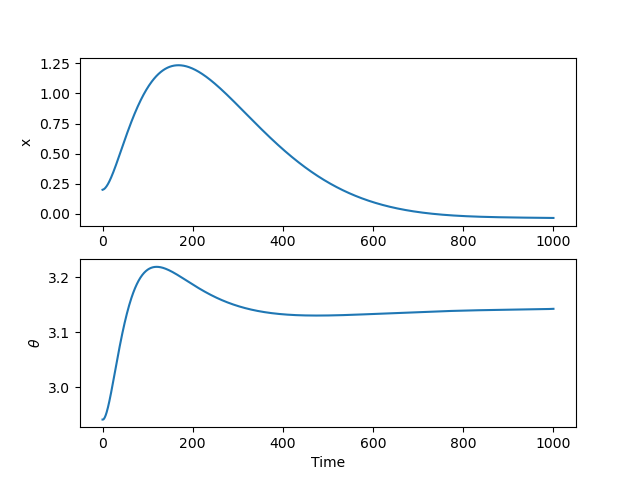

In [6]:
mp=1.
mc=5.
l=1.
g=9.81
delta_t=0.01
horizon_length=1000

x0 = np.array([0.2, 0.1, np.pi-0.2, 0.])
A=np.array([[1.,delta_t,0.,0.],[0.,1.,delta_t*mp*g/mc,0.],[0.,0.,1.,delta_t],[0.,0.,delta_t*(mc+mp)*g/(mc*l),1]])
B=np.array([[0.],[delta_t/mc],[0.],[delta_t/mc*l]])
Q=np.eye(4)
R=0.1*np.eye(1)
check_controllability(A,B)

P,K=solve_ricatti_equations(A, B, Q, R, horizon_length)

# here we need to add the feedfordward command uff computed due to the change of variables
uff = []
for i in range(horizon_length):
    uff.append(-K[i].dot(np.array([0.,0.,np.pi,0.])))

X,u = simulate_cart_pole(x0, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81)

plt.figure()
plt.subplot(2,1,1)
plt.plot(X[0,:])
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(X[2,:])
plt.ylabel(r'$\theta$')
plt.xlabel('Time')
animate_cart_pole(X)

/var/folders/hp/yg2kcb2j4c1fskm61_gk9q0c0000gn/T/ipykernel_46096/3612641173.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[i] = K[i].dot(x[:,i]) + uff[i]


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAQMhtZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTcg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAL
22WIhAA3//728P4FNjuY0JcRzeidMx+/Fbi6NDe9zgAAAwAAAwAACNCLwaGfD0238wGYfdMii7By
vZNRdVBYvP3RAB4eACSVbF22Bsmyfb6jzR5K2ild3BqjjLWTX15l+3kBfmX+S+b/cJwZnoxzWW4k
h1lNU0bzpLved8/z/TYHCK4iVpFsRecssZ044EZ1d/bTCvn/jvzUha/DzaQcRTcQEEl8pyhubYMm
weeNUsHndYJhACtcaf0GVSLFYlIVu5CozKH/PcDSr3Vo/0usF4jXBeeENYS6MSxEqFbqHPnCen3U
uPMWwn50AyvXhXyg2YpR2NCj5LxgiFEQ3HUBjj9jlX4zHWKKQsXd3QEaRxfQm79G9HG5XXHFUryo
8MWVB+IEz+BtNGbxo/nYZUDxu22DRqYD1eQIS2i19Cuiym0Lq97k4SffxbkYMMEUreYRR40EuUd0
Trku0EX2TiGUtn4Y0wygNyzaU7OSGhurOvn6bBLPGM0CoPAy8CTh3bT7kV6/UU29gC9GCIkNnsoC
OPLlQ7DOlEKytPbVQtadmhHu1dl2hQJF0jTfENZ+tL/l/kvmmZVG8XsUw6vV19+44PD+ptlTEmx1
cUjSTx+nGWW6Ob/HHEVAfVWzr/XP/6mZtpgbgUx8VbTswdFgd28dnPT7DA2BX+T4U2uZ1KevVP4Q
V06r68znPUufD4Bcn/+wFDo0HtroTGZJqkavRmHFqCTD6YgOEe/PGBMysNnbOp6M5k8Yk02SfrVT
SAGjFGPVQeyVI8O86EWWWZePXu9Hkp+ffA8sTouoF+pRlej6XufrSEVVo4+zVo+dNMEv5hGJq995
rIeWgAAoFVUaTdAC3gqHVQ5AQqaIQ2SvYy4CHWE2Bj5UUkuEozonnYRPLLhHbf+nZr6SXwrHGr+q
lfNp/DCGuowEhQNmV6gZMt3//dGFpcBEyf5AYWebZ2hHr86jHI4kGxTgiZWu0DeCSWXSxBeiKpVE
ROqcCoPtEiUAvjsCjV8esIQZX02hdyqeHUGAVkTLMa22w1z5xAVByd/gXKgFO0Vbs/d7ajyx0u7M
q2dNHGaKauUrj9O5j8CZ2w8GpVRk3IObPiv3gJvB69O34mN6vyg5KX/7c9+6OE1keZfjgH56Yqsw
U0ylltH8BzHWegtTvX69/V5KvYx0u/2bjWp+e2imCD/S63fuTvKqh/VEiRIniPs0fLB+m/QsV4ct
5HDs2vfvOyGUi8aHScDjgKinGIV8EHLYA4n1wsxI3MvBSlAK0ajetmzjdZgfw5dDPw+r2AU/fS9F
f+eyG3pYVL8Z8cbheqteytUab4FkWop4YRv7AcOJs1zV4hraQx32pZQpShd9VFgO+jdUgn52Tejc
zEyBueaCA4CpDvqhIAAHFZbWHwatK/Aqhn1g8f3qxf2X3ozunLyxutVcSagiWVOsvAgS96D754ps
klIcpqwfL02M9x+z9pWLl/h7gjZx+erpwDxvw03/a2Xjir8kYoOWEcSlKRhD7aLDekQOPWR23Mx2
z27fx+ZtHV98Dyv87qH7f+flPU20P8D9Oxxb10GfiMSQAgEGRXJ03plITfG7zr/1Upaz0+UWH2sL
GmTegW2YXdfqFanAkIVArC4/4E39FrrEOC6OHYzrOad39nqQpqMMEnnfo1aIJR93eNlrdUsXjvi8
VAmaEDhB/es6lj64W+bsOoF6pshpXR2f+WY1ma/AL7sWmPG4hywciWcGOVm3UkU4KAK6FNX12We/
h9mhxRzJ7adbH2SRQJ4FkdgAQr/AS5dwFBZYjM/3vMsgHphx5QKXEIqZGIk5ovjpKtgfSUQU9xpK
LJUIX6u4aT1qb4Gus2LHyZKIO5HnQlHHDD81/r4ZA9SH4O7lKJCRx5pG4j8RO8l/m5Zjs8Gf+e/L
Qpm9kNm6MfWeKxz/qKhIyKROdv+Xt/Uz5yvJQP8Ym0gXncVrmAB2CJVYsY2JT6JbqxS+09xMg1aI
hxzeBgfVeNlS5Oua12tZAEex/WnImnUvgukxD7fejMTs/y9kpLgxCH1O1o4AWS142r96iXEAnMAH
/Hws+mml0sRTer2EmiJvffdhenwpfmzgmdHLc6JneJ5dpim9RRaisH0pGrhJqNkI/u2WhvPnw4Pe
BenKVg1XjrCRCBbUjkZS27lw5pkuMzzDtfIOCqVldwFgb15WLgfuxJaEgR1qpMnVU50EMV2PBxSy
DjDxdxRHi8vsg+1dr4/oCg9CjLboAjNTyM7jOeZygDFO7G1Tpz5fviy6UTj7DrVSGH62SiA0fAdt
/0IKdANdfcjYMj2k3yUxusdyQEEScIhBt1tJoZ6ZhIV6tynMCXweHV61mcwKDvQD6aoyInsjQ7c8
9qgsq5CYCwLQTp1m1vGN95Hq32Hotpa/puygX7tCiN2sDsE3QNwmlhNjV6w0018UDlyWcEpwB5T1
owrTdl0UBzt+donhzfeCVc50DRjC5hp/If7hlHSD6F36BX8q1azfAqhZXGu7l3dytVLkoSSJw5R8
53+5BL4RL5l/GCQ4RbuC2Itdt6Sz9RqCkgD/IPYTFPRmY10MDFfZ0eYpUCIYfs4cJ1o557toGhXS
6CwgnmMdLT6dUje+HyF/R8jRvqyOOAfm1tJcx45LSHkGhGe9NUvfl4oTLswdeaiI796p+tzhANzk
BQaCPrBNoloMfUOjlMDCoQMRi8zJ/ydXI5uhBP3qKa284OfG8/XbAgBuNtvPd6WfYL03YmuV6jTp
7MAZ5nZF7qi0pBlUyNYRBbrRp7XSWaXZMdXGscPb2HBMa+2KaA3SKS+MBN3ZdJ/KQLqEbmpZ9mun
pxkjNwqZ43ue5eU1OGzXWGAleGfjFrFD7SsZWNo5tUFwMVK/kzlmkAVFYHUv8+oFcidtukBIqqEA
3EdOJEePf+uTNsGGPj1Zp

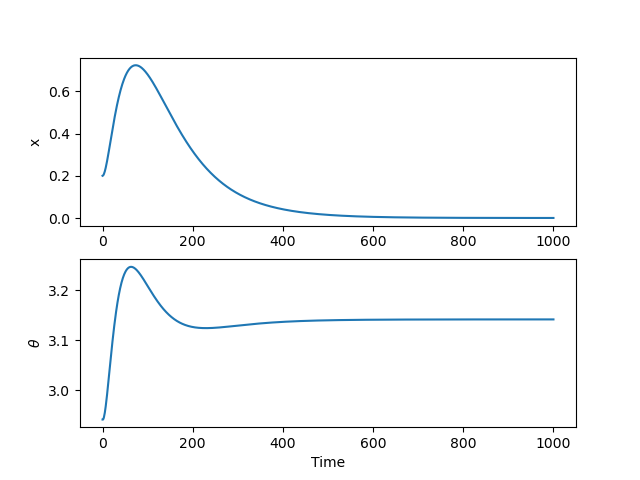

In [7]:
#Q2 By changing the cost we can change the response of the system
# we example here we reduce the control cost R to increase the speed of response

R=0.001*np.eye(1)

P,K=solve_ricatti_equations(A, B, Q, R, horizon_length)
# here we need to add the feedfordward command uff computed due to the change of variables
uff = []
for i in range(horizon_length):
    uff.append(-K[i].dot(np.array([0.,0.,np.pi,0.])))

X_1,u_1 = simulate_cart_pole(x0, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81)



plt.figure()
plt.subplot(2,1,1)
plt.plot(X_1[0,:])
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(X_1[2,:])
plt.ylabel(r'$\theta$')
plt.xlabel('Time')
animate_cart_pole(X_1)

/var/folders/hp/yg2kcb2j4c1fskm61_gk9q0c0000gn/T/ipykernel_46096/3612641173.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[i] = K[i].dot(x[:,i]) + uff[i]


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAFMNtZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTcg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAL
KGWIhAA7//73Tr8Cm0WXagOSVwr2yqQmWblSawHypgAAAwAAAwAAAwLa9High8PTbfzAIifCzUZ2
bpN8cgEkd9LJ+9Qrv8nO/q0Ps5FTRYAS59rVmA0Fhf8s1uR5I/wch5VX0SVPopkFv/QnaPir/8ze
tiOoGFjBTx211Anvk3lBvoKMc0lfoFz94y8Xj+Cm3HsnKl+qNeiJvMGOo8SiQVqDfqRarjC/blvb
uZjDADuUqYE9sJYpFh8x/HpAisel9+TvbX5envOgxF2S7qtSYYJiqdrZnbnZuMkwz4PoOYvu7qdr
Ip55dPtS4nnQfdWsGcBISG90Cy5+VSa8Ag/pC9gA7ZJmgGwLgtRidI/z4gA54K+WBTJlx1WIbzms
2RVOH15zjfCuvUhPMeernLQFdjQEODUXbmJGpQMgcLJ1yNEItis0PoL5EAd4Nmwpt8rqumQK0rUD
Oyh/lhr2NVYNrfi7hmNN2yiFji0ZyItNcJv6Sz0jU4SQpBRmgBMvoeewlI9MxLHxIPvEdNmtqgdi
L8yFWVULTrZgcFeF6nJ2nkvTYUSEnHp90QmB04DXVLfy7CLPfBivsk58sSiHeYZJsucEyXKM+jpl
LVYRHgeoSgVGb4yAua/ugVWaeVnEqfuyCiyHwIakg0YM7dHv11Ke161qRlNB8yuewEg9kt4Tdb2i
mDD3tvuxinZFGSNoRn+HR411kEAcB8lYErbqkUpnNIEELknqGWwzoS9OBYUSnCMlsOAh5Kzi6gwb
ImBHISDv07G4nsJt3MBTy04PFOueNnH2fXwWnovkwcvLp6uWluYw8AjCCrPrn1m6DGQBkSLZ5ilM
7YeDUqo8zSSgeHEvmrCY1DyAEIGTPm1zs4r+5SIwN2l2aqJTbpQQQ9b38o2HXIFiU8LjGn+r9PhW
R0O3FeZjcpGjZBS9UhjvPxeY9I8quH6BH5eZpzCqr5+KrpTdP6fMYUuc/KseXtYs7u/aFIkfWqtI
Qea0IF20as6HxVmlqW5JSLneaY7uT7noP54VFuqEzfrMlcICt7+YFZTNeKdyFUO4AADSg5+Ly5ED
bvgomO6weSg5dtZfusQ3UiKW5HKjk9fwahp3kqpTZcw9uNIy+Y2Dg/7k3Scm533Zn+o9fL/0HyJ6
h3Z0DzzdlKDFua28N16V6QFI8iSJp7NLE/wKbXETc5avrK3Rv/weozHh6JyZMrf1GVaMEawOv0mV
nld7jD6YvXXn8t4WzAQyX9PK9eE0RDj4zL2MV2CHKCqWDm3dMG93MmckEcjGAAQMDAE5MccttbbT
HhGwLXmOGhM2PsLtqbp/yy8N48xrbN2P4qw7E7cVPCy8e/4L7Ovhex1bFThZKh+eGgu8aFlDfA5S
sSP4mUm29ZUiUWinZh0kLttTbiLJXjNgD/PXGn+wd2/tAijEbqnLkF516GwYSiBRIOLkjRJjo+DT
LJCqa1WYV2dcRWmAqsxr705xim2X/q58LJ+8sIHYkAX80yhN1XB7upGliDAk9Sd25NH8rqF1V6d6
z9PboWKgSitD1LiPa2DGHUHwpg1RzAaxF41W7g/PHeECI8TVkWoCTPp7XasRjYTkl11hvQBoXm5a
BYNlfkKHJNJOPq1BTrVoiN2uqfOjfk8sVp/DQQ7YhVKpLNm3qzIpqSmxhJeGJATtDkUsvKy4dYn0
CSrMxunK+29ZZlRe3zqHBTj47jaA0yxiLg23VlfjRGMZZO1uKS2xUoiRJmzkbXBPo+aaDWQX5jnu
zbp2E1A8rnF86S858ude4wIPx28Zz7E/JcYKfcdPWI36nZ0vxYUB67YJBu3LjC+l1FMByXEkoQe4
digva4UVLSXLVLOKXNY4d7D8QFW5pDI62xOnbBjvMyjpPW9GpG7D57djjtTXdTAwHB/A7mXPfVWq
Ar6tudYXHBh+kyO+rGuihMjg4dAN12JXRXw9JP1yQKSwb7fuQGI/btdZiRUa0yuHuS3rnv0xqXKz
nhOSRZm8gRh1nc39pJm7kK/GGov3fBMcB+K5xXCxmjjOR0McHNAolRvvettAtqE8tgsvQdk59DVT
1aHe/zGSmGCDlPvyuM3AuDBfpfc6qqZidF8fTzCzbj6Zw1GO/9rOh3l9cEYSWat5Lerm5XZBPrYK
QoQHp3sLrUPXdsyOOxgUVX4Qr6hh+3viEzhgF0lgWMiI2Y001uezcne/fBd8YA6DG26JFFUB5nIW
ewfC3CFjSvLxW5hb3GQReG29m+KWIhJcWDWCKXc1payoM3BSq5Brz7Y/2i1rJLamsrfQhu/8EjYU
NjXU2qFi6m8kN0TSqi4PnM8sXnSMKwn3Jh3SGWtqbvApGGF/kJWWTU4QbBvVRIecdJv0QOrfB+OR
38rxjj9cXrZkZyoxDgZ8Rb2ACyNymnfvH1b89LVqZ6rpenQbHeHVRzlnNI56dLX23u+ZHY0l72Hh
BOp807TbCGAA/aJZljQaTO/Zv2cBhkf0+T3JsWufsHptvQiptSsSoAChIviihZaH8VP1iMZ6PiTO
M8DvDWP7ABHjyqQBEDjiKvj7woFgsrQ/BUrpiLab0p6zal6I8YTlUf9IWm6udvLCk/IU/88Rh8Ts
AZ+OR8CriFKpee0qYAdg7+wi4zOyUIAyKlnMEZ0S+YSN1fLN61RqcFkQxUy6uRJNEXmun2zwRI05
Eyosn22gm0LKw9//Vwhhry2JKxQPdh4ZhCgJUL4U6EH47pmG3rUwrmeCKmK3OFTs0G5sqYRa4tW3
/rkzfMYRGVkO8aE9fB0LZf1olIwk2kHVzJ17BsyL3UWNqhizLQk81UZ2tgHWRILDiUAeQwTJB1oh
2k8WKgoXxpR51hud4F/jP1Kf682ZkFBZcfmiKA+j8nWslIWU/Hd/oMAOtQWll8qWawfY2ToMFU2j
nE4yaYkaAAy3y0k0YDPFZ

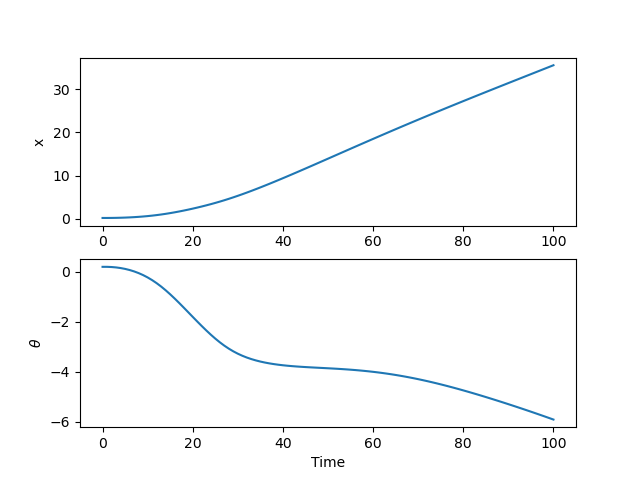

In [8]:
#Q3 the system diverges if we start it far from the linearized state!
horizon_length=100
Q=10*np.eye(4)
R=0.1*np.eye(1)
x0_2=np.array([0.2,0.1,0.2,0.])
P,K=solve_ricatti_equations(A, B, Q, R, horizon_length)

uff = []
for i in range(horizon_length):
    uff.append(-K[i].dot(np.array([0.,0.,np.pi,0.])))

X_2,u_2 = simulate_cart_pole(x0_2, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81)


plt.figure()
plt.subplot(2,1,1)
plt.plot(X_2[0,:])
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(X_2[2,:])
plt.ylabel(r'$\theta$')
plt.xlabel('Time')
animate_cart_pole(X_2)